In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy, pandas as pd
data = pd.read_csv("Data/heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


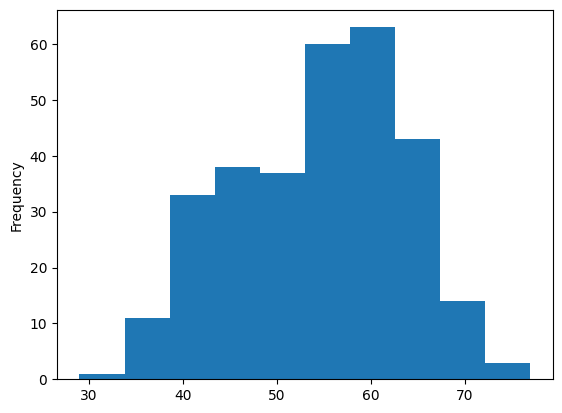

In [6]:
data["age"].plot.hist();

In [ ]:
#age_sex = pd.DataFrame()
ages = numpy.sort(data["age"].unique())
type(ages)
males = []
females = []
for age in ages:
    males.append(len(data[(data['age'] == age) & (data['sex'] == 0) & (data['target'] == 1)]))
    females.append(len(data[(data['age'] == age) & (data['sex'] == 1) & (data['target'] == 1)]))
ages, len(ages), len(males),len(females)

(array([29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 74, 76, 77]),
 41,
 41,
 41)

Text(0.5, 0.98, 'Heart Disease Analysis')

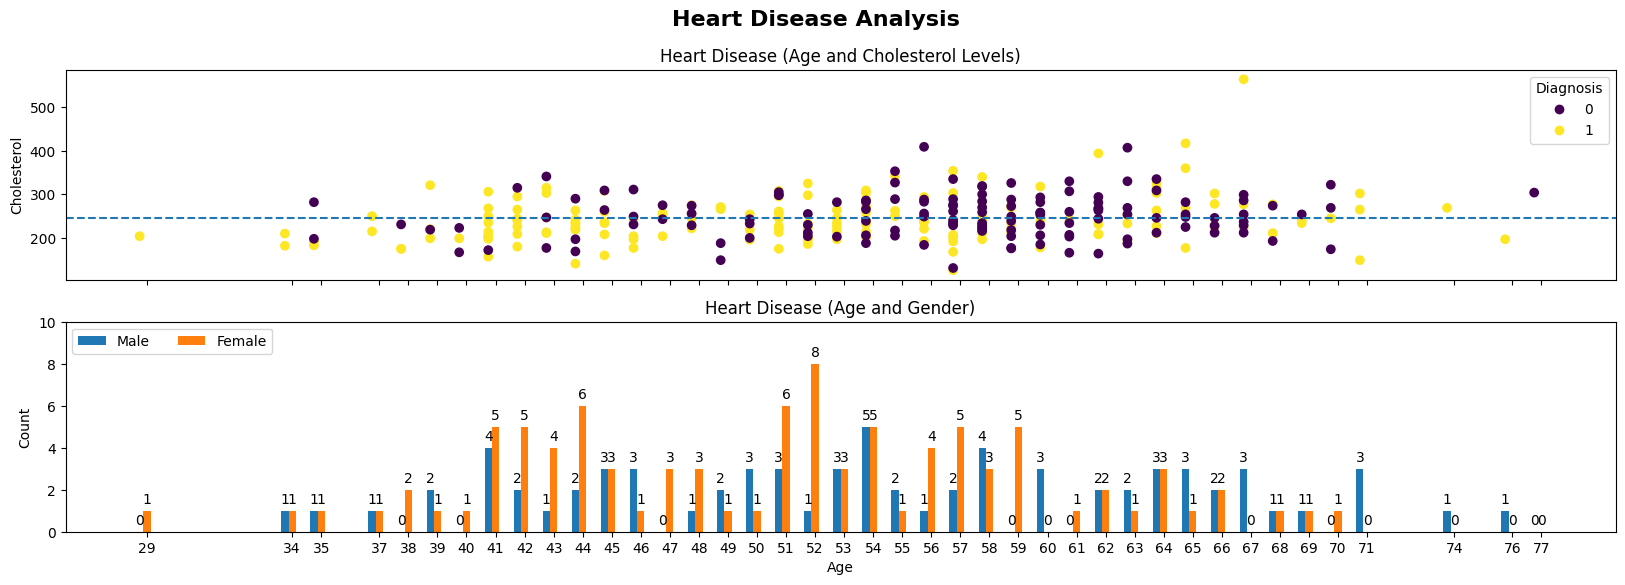

In [60]:
#data.plot(kind='scatter', x='age', y='chol', c='target')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,6), sharex=True)

age_cholesterol = ax[0].scatter(x=data['age'], y=data['chol'], c=data['target'])
ax[0].set(title="Heart Disease (Age and Cholesterol Levels)", ylabel="Cholesterol")
ax[0].legend(*age_cholesterol.legend_elements(), title="Diagnosis") # legend_elements() will look for the c=data['target']
ax[0].axhline(data['chol'].mean(), linestyle="--")

genders = {
    'Male': males,
    'Female': females
}

x = ages #np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for gender, count in genders.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, count, width, label=gender)
    ax[1].bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set(title='Heart Disease (Age and Gender)', xlabel="Age", ylabel="Count")
ax[1].set_xticks(x + width, ages)
ax[1].legend(loc='upper left', ncols=3)
ax[1].set_ylim(0, 10)

fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")
#fig.savefig("~/Downloads/HeartDiseaseAnalysis.png")